<a href="https://colab.research.google.com/github/mmartin46/Data_Science_Research/blob/main/MBTIScores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mark 16:16

In [2]:
import pandas as pd
import altair as alt
from altair import Chart, X, Y, Color, Scale
import datetime as dt
import matplotlib.pyplot as plt
from pandas.core.common import random_state
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

In [6]:
df = pd.read_csv('/content/mbti_1.csv')

In [7]:
def char_count(df):
  df['char_count'] = df['posts'].str.len()
char_count(df)
df

,type,posts,char_count
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,4652
1,ENTP,'I'm finding the lack of me in these posts ver...,7053
2,INTP,'Good one _____ https://www.youtube.com/wat...,5265
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",6271
4,ENTJ,'You're fired.|||That's another silly misconce...,6111
...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,5011
8671,ENFP,'So...if this thread already exists someplace ...,7902
8672,INTP,'So many questions when i do these things. I ...,5772
8673,INFP,'I am very conflicted right now when it comes ...,9479


In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
swords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
swords

In [10]:
def stop_word_count(df):
  df['stopwords'] = df['posts'].apply(lambda w : len([w for w in w.split() if w in swords]))
stop_word_count(df)
df

,type,posts,char_count,stopwords
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,4652,221
1,ENTP,'I'm finding the lack of me in these posts ver...,7053,464
2,INTP,'Good one _____ https://www.youtube.com/wat...,5265,309
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",6271,430
4,ENTJ,'You're fired.|||That's another silly misconce...,6111,411
...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,5011,332
8671,ENFP,'So...if this thread already exists someplace ...,7902,500
8672,INTP,'So many questions when i do these things. I ...,5772,366
8673,INFP,'I am very conflicted right now when it comes ...,9479,713


In [11]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 12.4 MB/s eta 0:00:00


In [43]:
comp_scores = []
siA = SentimentIntensityAnalyzer()
df_len = int(df.axes[0][-1]) + 1

In [44]:
from textblob import TextBlob

In [45]:
for i in range(0, df_len):
  blob = TextBlob(df['posts'][i])
  sentiment = blob.sentiment.polarity
  comp_scores.append(sentiment)

In [47]:
df['sentiment'] = comp_scores

In [66]:
df

,type,posts,char_count,stopwords,sentiment
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,4652,221,0.145127
1,ENTP,'I'm finding the lack of me in these posts ver...,7053,464,0.163282
2,INTP,'Good one _____ https://www.youtube.com/wat...,5265,309,0.174137
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",6271,430,0.114959
4,ENTJ,'You're fired.|||That's another silly misconce...,6111,411,0.056805
...,...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,5011,332,0.134898
8671,ENFP,'So...if this thread already exists someplace ...,7902,500,0.280931
8672,INTP,'So many questions when i do these things. I ...,5772,366,0.105284
8673,INFP,'I am very conflicted right now when it comes ...,9479,713,0.117591


In [58]:
type_sent = df.groupby(['type'], as_index=False)['sentiment'].mean()
type_sent.sort_values(by=['sentiment'], inplace=True)

In [69]:
char_df = df.groupby(['type'], as_index=False)['char_count'].mean()
char_df.sort_values(by=['char_count'], inplace=True)

[Text(0.5, 0, 'MBTI Type'),
 Text(0, 0.5, 'Character Count'),
 Text(0.5, 1.0, 'Character Count')]

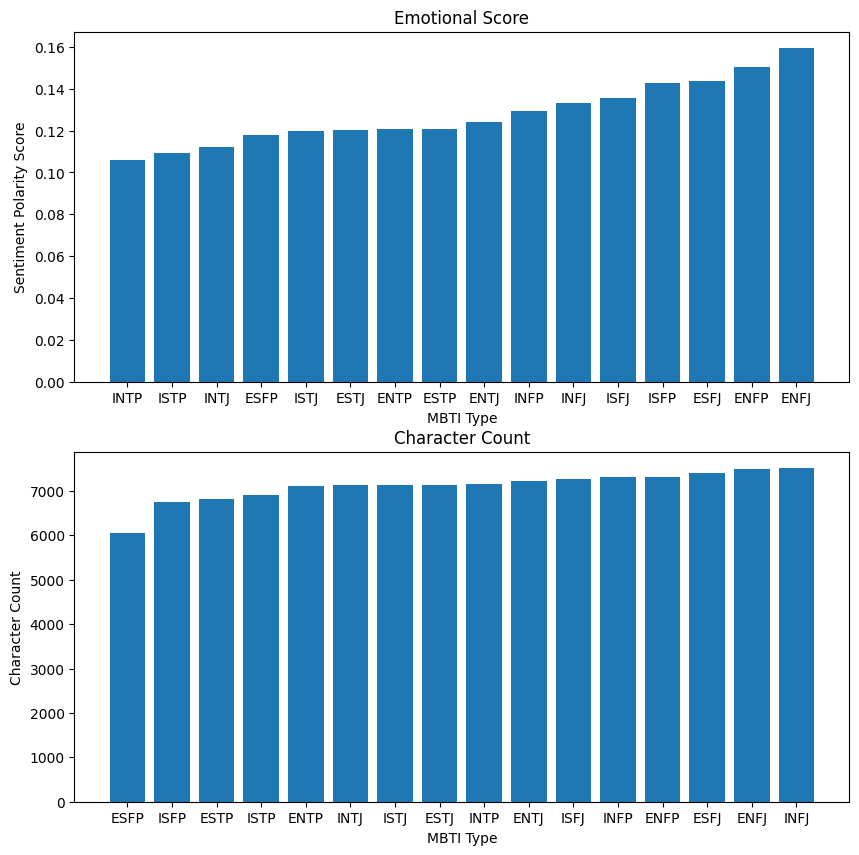

In [70]:
fig, ax = plt.subplots(2, figsize=(10, 10))

ax[0].bar(type_sent['type'], type_sent['sentiment'])
ax[0].set(
    xlabel='MBTI Type',
    ylabel='Sentiment Polarity Score',
    title='Emotional Score'
)

ax[1].bar(char_df['type'], char_df['char_count'])
ax[1].set(
    xlabel='MBTI Type',
    ylabel='Character Count',
    title='Character Count'
)
